In [1]:
# Imports and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Read data
path = Path("crypto_data.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Clean data
df = df.dropna(how='any')
# Filter for only coins that are currently being traded
df = df[df['IsTrading']== True]
# Remove IsTrading column because it was rendered unnecessary
df = df.drop(['IsTrading'], axis=1)
# Filter for cryptocurrencies that have been mined
df = df.loc[df['TotalCoinsMined'] > 0]
# Deleting coin name column and Unamed column
df = df.drop(['CoinName','Unnamed: 0'], axis=1)


In [5]:
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Convert the remaining features with text values to numerical values
df_dummies = pd.get_dummies(df, columns=['Algorithm', 'ProofType'])
df_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies)
print(X_scaled)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [11]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
pca_df = pca.fit_transform(X_scaled)
pca_df

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         9.57234205e-16, -2.11469414e-15,  8.76221761e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         2.28533713e-15, -1.73100279e-15,  8.82823293e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
        -3.51037842e-14,  1.06482358e-13, -6.60916271e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         9.98793284e-15,  5.10697505e-14, -1.02007349e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.90049046e-15, -2.42369869e-15,  9.92265708e-17],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         6.51071425e-16, -1.57133933e-15,  3.65596727e-15]])

In [13]:
# Further reduce the dataset dimensions with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
tsne_df = tsne.fit_transform(pca_df)

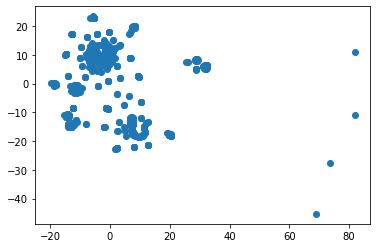

In [17]:
# Plot
plt.scatter(tsne_df[:,0], tsne_df[:,1])
plt.show()

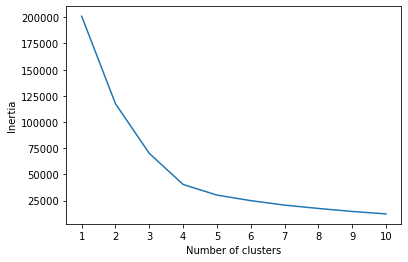

In [19]:
# k-Means Cluster
from sklearn.cluster import KMeans
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on these results, I would reccomend clustering the cryptocurrencies. The best number of clusters is 4 as that is where the "elbow" of the plot is.